## Methodology

* Load data
* Data exploration
* Data processing
* Models
* Evaluation
* Prediction

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

* Load Data

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/House Prices/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/House Prices/test.csv')

In [3]:
print(np.shape(train))
print(np.shape(test))

(1460, 81)
(1459, 80)


* Data exploration

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

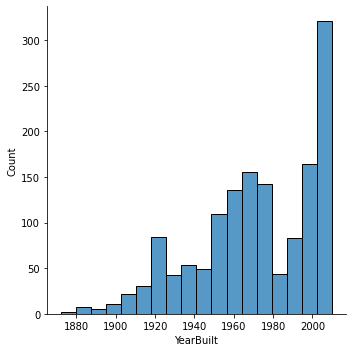

In [6]:
# sns.displot(train['SalePrice'])
sns.displot(train['YearBuilt'])
plt.show()

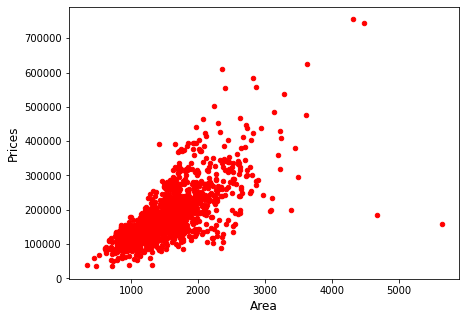

In [7]:
plt.subplots(figsize=(7,5))
plt.scatter(train['GrLivArea'], train['SalePrice'], s=20, c='r')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.show()

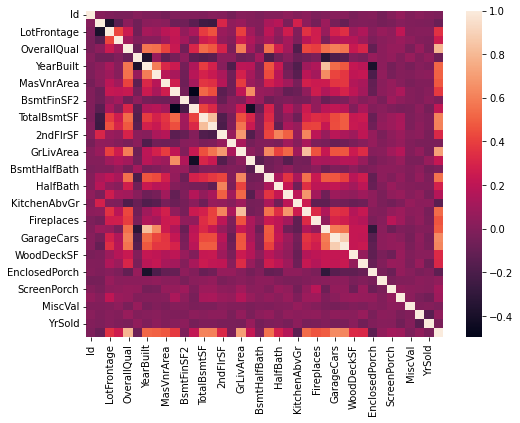

In [8]:
plt.subplots(figsize=(8,6))
corr_m = train.corr()
sns.heatmap(corr_m, vmax=1)
plt.show()

* Data processing

In [9]:
pd.isnull(train).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
print(pd.isnull(train['SalePrice']).sum())
print(pd.isnull(train['GrLivArea']).sum())
print(pd.isnull(train['YearBuilt']).sum())

0
0
0


In [11]:
Xtrain = train[['GrLivArea', 'YearBuilt']]
Ytrain = train[['SalePrice']]

Xtest = test[['GrLivArea', 'YearBuilt']]

print('X_train', Xtrain.shape)
print('Y_train', Ytrain.shape)
print('X_test', Xtest.shape)

X_train (1460, 2)
Y_train (1460, 1)
X_test (1459, 2)


In [12]:
Xtrain.iloc[:,0]

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

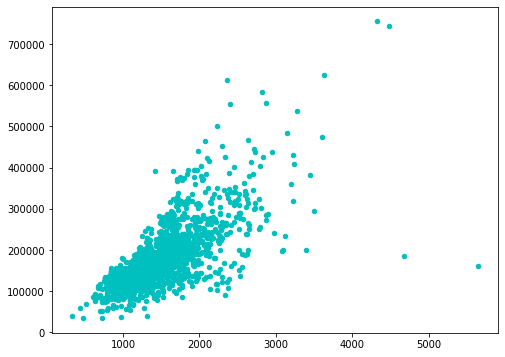

In [13]:
plt.subplots(figsize=(8,6))
plt.scatter(Xtrain.iloc[:,0], Ytrain, s=20, c='c')
# plt.scatter(Xtrain.iloc[:,1], Ytrain, s=20, c='salmon')
plt.show()

* Models

  - with Sk learn

In [43]:
reg = LinearRegression().fit(Xtrain, Ytrain)

coef = reg.coef_
interc = reg.intercept_
print(coef)
print(interc)

# plt.subplots(figsize=(8,6))
# plt.scatter(Xtrain.iloc[:,0], Ytrain, s=20, c='c')
# plt.plot(Xtrain.iloc[:,0], coef[0,1]*Xtrain.iloc[:,0]+interc, c='r')
# plt.show()

[[  95.16733349 1045.86241944]]
[-2024976.36258564]


In [54]:
y_tr = reg.predict(Xtrain)
rms = np.sqrt(mean_squared_error(Ytrain, y_tr))
print('rms', rms)
print('score', reg.score(Xtrain, Ytrain)*100, '%')

rms 46714.13746626041
score 65.39902028290658 %


* Prediction

In [45]:
y_pred = reg.predict(Xtest)
y_pred = np.reshape(y_pred, (len(y_pred)))
y_pred

array([111229.77275073, 149299.64089407, 218638.4752997 , ...,
       141398.79571638, 150693.89043182, 249762.10634713])

In [46]:
test.Id.shape, y_pred.shape

((1459,), (1459,))

In [47]:
len(test.Id), len(y_pred)

(1459, 1459)

In [ ]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
output.to_csv('House_Prices.csv', index=False)